<a href="https://colab.research.google.com/github/galettomatias/DS_GALETTO/blob/main/DS_GALETTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El archivo proporcionado es un conjunto de datos de salud centrado en accidentes cerebrovasculares (strokes). Este dataset contiene información relevante de pacientes que incluye características demográficas, antecedentes médicos y hábitos de vida, entre otros, y está diseñado para ser utilizado en análisis y modelado predictivo para entender mejor los factores que contribuyen a los accidentes cerebrovasculares.

Las columnas del dataset incluyen:

	•	id: Un identificador único para cada paciente.
	•	gender: El género del paciente (Male, Female, Other).
	•	age: La edad del paciente.
	•	hypertension: Indica si el paciente tiene hipertensión (1) o no (0).
	•	heart_disease: Indica si el paciente tiene una enfermedad cardíaca (1) o no (0).
	•	ever_married: Indica si el paciente ha estado alguna vez casado (Yes) o no (No).
	•	work_type: El tipo de trabajo del paciente (Private, Self-employed, Govt_job, Children, Never_worked).
	•	Residence_type: El tipo de residencia del paciente (Urban o Rural).
	•	avg_glucose_level: El nivel promedio de glucosa en sangre del paciente.
	•	bmi: El índice de masa corporal (BMI) del paciente.
	•	smoking_status: El estado de tabaquismo del paciente (formerly smoked, never smoked, smokes, Unknown).
	•	stroke: Indica si el paciente ha sufrido un accidente cerebrovascular (1) o no (0).

El objetivo principal de este dataset es permitir la exploración y análisis de los factores asociados con los accidentes cerebrovasculares. Los investigadores y profesionales de la salud pueden utilizar estos datos para identificar patrones y relaciones entre las distintas características y la ocurrencia de un stroke. Por ejemplo, pueden analizar cómo la edad, los niveles de glucosa en sangre, el BMI y los antecedentes médicos como la hipertensión y las enfermedades cardíacas influyen en la probabilidad de sufrir un accidente cerebrovascular.

Además, este dataset es adecuado para aplicaciones de machine learning, donde los modelos predictivos pueden ser entrenados para predecir la ocurrencia de accidentes cerebrovasculares basándose en las características de los pacientes. Esto puede ayudar en la identificación temprana de individuos en riesgo y en la implementación de intervenciones preventivas más efectivas.

In [52]:
#importar librearias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
#importar Dataframe y mostrar las primeras 10 filas:
df_healtcare = pd.read_csv ('https://raw.githubusercontent.com/galettomatias/DS_GALETTO/main/healthcare-dataset-stroke-data%20(1).csv') #,index_col = 0)
df_healtcare.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [105]:
#Ponemos de Index a ID
df_healtcare.set_index('id', inplace=True)
df_healtcare

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [106]:
#Shape o Forma del dataset.
df_healtcare.shape

(5110, 11)

In [107]:
#Tipo de datos en cada columna
df_healtcare.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [86]:
#Retorna solo las variables numericas, incluye varias estadísticas descriptivas, como la media, la mediana, el máximo, el mínimo, los cuartiles, etc. para cada columna
df_healtcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [87]:
# Verificar si hay valores faltantes
df_healtcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [109]:
#Como a la edad (age) la toma como float64 es porque hay valores con decimales, vamos a transforar los valores a enteros
# Redondear las edades al entero más cercano
df_healtcare['age'] = df_healtcare['age'].round().astype(int)

# Convertir columnas categóricas a tipo 'category'
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for col in categorical_columns:
    df_healtcare[col] = df_healtcare[col].astype('category')


# Imprimir el DataFrame modificado
df_healtcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   int64   
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(6), float64(2), int64(3)
memory usage: 270.4 KB


In [110]:
df_healtcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237
std,22.612731,0.296607,0.226063,45.283560,7.854067
min,0.000000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.500000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


In [111]:
# Cantidad de filas por columnas
df_healtcare.count()

#BMI presenta valores faltantes

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [112]:
#Reviso el total de datos faltantes en las columnas con nulos
df_healtcare.isnull().sum()

#se confirma la ausencia de datos de esa columna

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [113]:
#CAMBIAR DATOS FALTANTE DE LA COLUMNA BMI POR LA MEDIA
# Calcular la media de columna BMI
mean_bmi = df_healtcare['bmi'].mean()

df_healtcare['bmi'].fillna(mean_bmi, inplace=True)
df_healtcare

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [114]:
#Reviso el total de datos faltantes en las columnas con nulos
df_healtcare.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

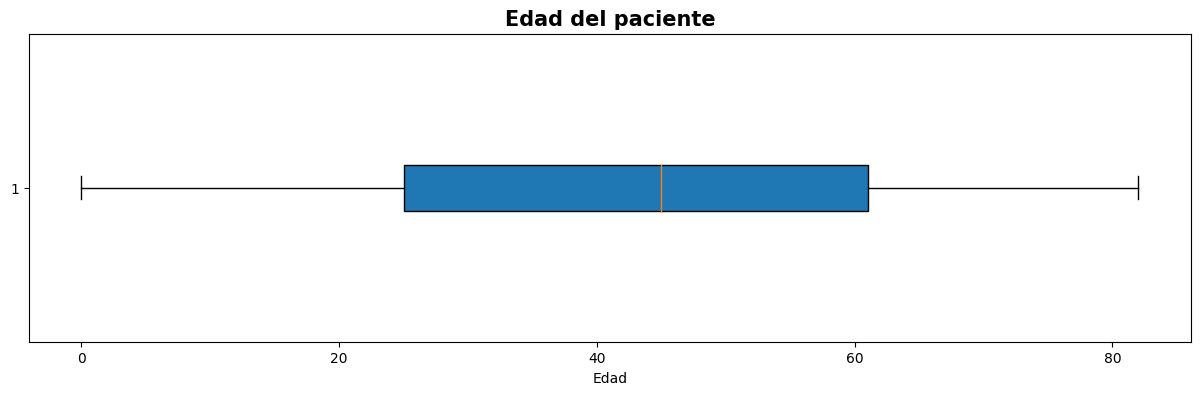

In [115]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_healtcare['age'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('Edad del paciente', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('Edad')
plt.show()

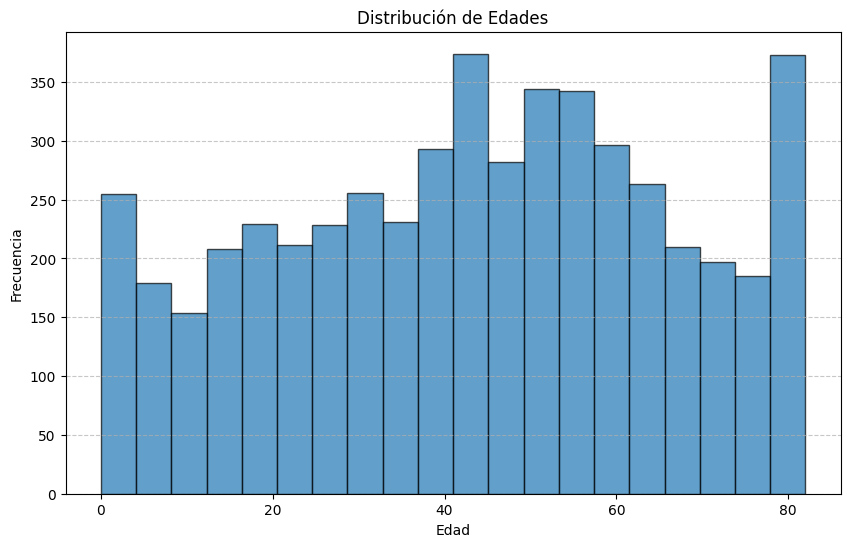

In [116]:
# Crear un histograma de la columna 'age'
plt.figure(figsize=(10, 6))
plt.hist(df_healtcare['age'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()

In [117]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo
median_age= df_healtcare['age'].median().round(1)
print ("Mediana: ", median_age)

max_age= df_healtcare['age'].max()
print ("Maximo: ", max_age)

min_age= df_healtcare['age'].min() #la persona de menor edad tiene 0,08 años
print ("Minimo: ", min_age)

Mediana:  45.0
Maximo:  82
Minimo:  0


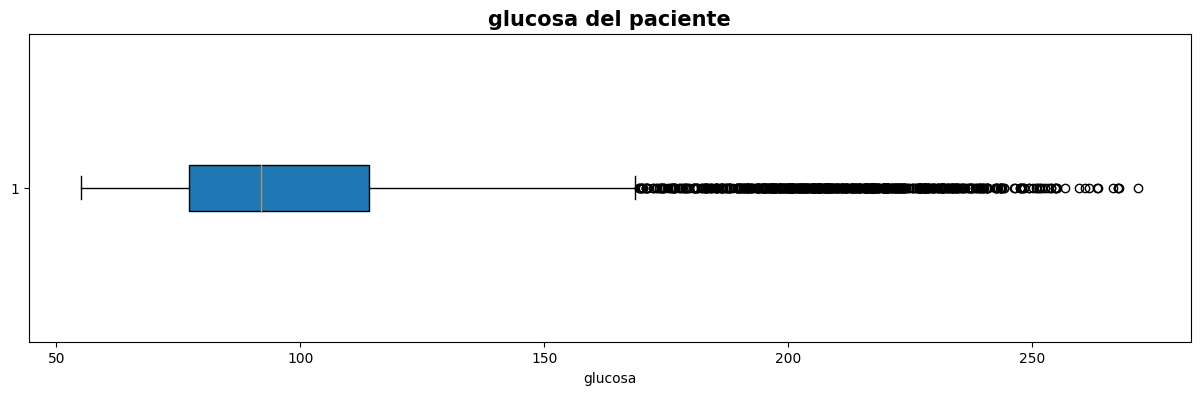

In [118]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_healtcare['avg_glucose_level'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('glucosa del paciente', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('glucosa')
plt.show()

In [119]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo

print (df_healtcare['avg_glucose_level'].median().round (1))
print (df_healtcare['avg_glucose_level'].max())
print (df_healtcare['avg_glucose_level'].min())

91.9
271.74
55.12
